Machine Learning, NLP and Pre-built models are trained and tested for tweets analytics. Disastertweets.csv file is used as a dataset that is downloaded from Kaggle. It  has 2559 entries and 13 columns.
Models testing accuracies are
CNN	(85.94),
Logistic Regression	(83.01),
Random forest	(87.30),
Support Vector Machine	(85.35).
Gradient Boosting 	(84.18),
K-Nearest Neighbors	(73.83),
Naïve Bayes	(82.62),
Roberta	(85.94) and
BERT	(84.77). In second Colab file 'Test2 for Tweets analytics', Bert model is further improved, SBert and Improved XGBoost model on top of SBert are also trained and tested to get accuracies above 90%. The results are good,
Improved BERT	has inceased accuracy (86.13) whereas
SBert 	(91.99) and
Improved XGBoost model on top of SBert	(93) have even higher accuracies in 90s.




# Step 1:  Loading and Processing Data

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
import re
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
tweets=pd.read_csv('/content/DisasterTweets.csv')

In [ ]:
tweets

,Name,UserName,Timestamp,Verified,Tweets,Comments,Retweets,Likes,Impressions,Tags,Tweet Link,Tweet ID,Disaster
0,Drought Center,@DroughtCenter,2024-02-29T13:30:07.000Z,False,US Drought Monitor 2-29-24\n\nHappy Leap Day! ...,0,17,13,18000,"['#droughtmonitor', '#drought', '#drought2024'...",https://twitter.com/DroughtCenter/status/17631...,1.763190e+18,Drought
1,Prabhakar Goud Kurmimdla,@PrabhakarGoud_K,2024-02-27T05:20:43.000Z,False,Synonym is #Drought,0,0,1,13,['#Drought'],https://twitter.com/PrabhakarGoud_K/status/176...,1.762350e+18,Drought
2,Humanity First International,@HFI1995,2024-03-03T07:03:34.000Z,False,"Across South America in the last two months, #...",0,9,19,419,"['#floods', '#landslides', '#drought', '#wildf...",https://twitter.com/HFI1995/status/17641848294...,1.764180e+18,Floods
3,NCWQ Worldwide News And Disasters Explorer,@RTheExplorer1,2024-02-29T10:20:18.000Z,False,Wildfires Going On In Texas #wildfires #texa...,0,0,1,34,"['#wildfires', '#texasfires']",https://twitter.com/RTheExplorer1/status/17631...,1.763150e+18,Wildfire
4,BestDealsEver,@MilwaukeeHotBuy,2024-02-28T17:58:01.000Z,False,START YOUR STAND UP COMEDY CAREER FOR $11.99 ...,0,0,0,210,"['#thevoice', '#rhonj', '#taylorswift', '#mia'...",https://twitter.com/MilwaukeeHotBuy/status/176...,1.762900e+18,Hurricanes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,Mark R. Sheridan,@DisasterLessons,2024-02-24T16:55:00.000Z,False,See Feb 23 2024 Story: Extreme Weather Is Com...,0,1,0,61,"['#Prepare', '#Flooding', '#Hurricanes', '#Tor...",https://twitter.com/DisasterLessons/status/176...,1.761430e+18,Tornadoes
2555,Ntate Mdluli,@NtateRanaka,2024-02-27T10:08:31.000Z,False,It can't be denied that the 2023/24 agric seas...,3,2,23,1000,['#Drought'],https://twitter.com/NtateRanaka/status/1762419...,1.762420e+18,Drought
2556,Earthquake Alerts,@QuakesToday,2024-03-04T09:11:04.000Z,False,1.7 magnitude #earthquake. 24 km from Coalinga...,0,1,1,584,"['#earthquake', '#CA']",https://twitter.com/QuakesToday/status/1764579...,1.764580e+18,Earthquake
2557,Trader PhD Ag Marketing,@TraderPhD,2024-02-29T16:44:16.000Z,False,The contiguous U.S. saw high #temperatures dur...,0,0,1,185,"['#temperatures', '#Drought']",https://twitter.com/TraderPhD/status/176324380...,1.763240e+18,Drought


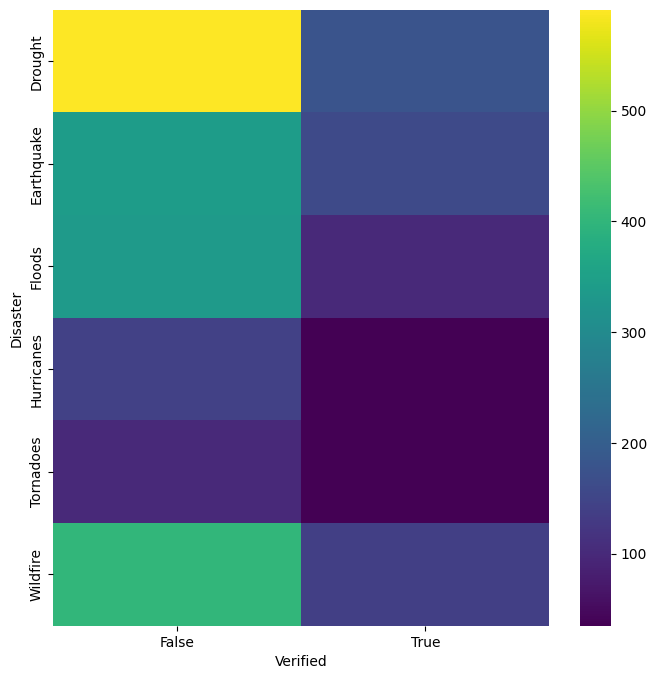

In [ ]:
# @title Verified vs Disaster

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Disaster'].value_counts()
    for x_label, grp in tweets.groupby('Verified')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Verified')
_ = plt.ylabel('Disaster')

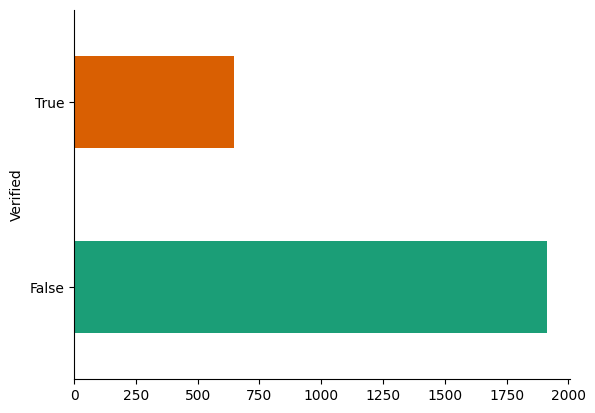

In [ ]:
# @title Verified

from matplotlib import pyplot as plt
import seaborn as sns
tweets.groupby('Verified').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

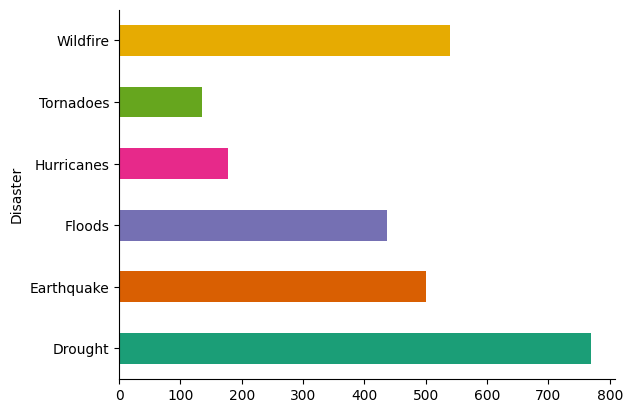

In [ ]:
# @title Disaster

from matplotlib import pyplot as plt
import seaborn as sns
tweets.groupby('Disaster').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tweets.head(10)

,Name,UserName,Timestamp,Verified,Tweets,Comments,Retweets,Likes,Impressions,Tags,Tweet Link,Tweet ID,Disaster
0,Drought Center,@DroughtCenter,2024-02-29T13:30:07.000Z,False,US Drought Monitor 2-29-24\n\nHappy Leap Day! ...,0,17,13,18000,"['#droughtmonitor', '#drought', '#drought2024'...",https://twitter.com/DroughtCenter/status/17631...,1.763190e+18,Drought
1,Prabhakar Goud Kurmimdla,@PrabhakarGoud_K,2024-02-27T05:20:43.000Z,False,Synonym is #Drought,0,0,1,13,['#Drought'],https://twitter.com/PrabhakarGoud_K/status/176...,1.762350e+18,Drought
2,Humanity First International,@HFI1995,2024-03-03T07:03:34.000Z,False,"Across South America in the last two months, #...",0,9,19,419,"['#floods', '#landslides', '#drought', '#wildf...",https://twitter.com/HFI1995/status/17641848294...,1.764180e+18,Floods
3,NCWQ Worldwide News And Disasters Explorer,@RTheExplorer1,2024-02-29T10:20:18.000Z,False,Wildfires Going On In Texas #wildfires #texa...,0,0,1,34,"['#wildfires', '#texasfires']",https://twitter.com/RTheExplorer1/status/17631...,1.763150e+18,Wildfire
4,BestDealsEver,@MilwaukeeHotBuy,2024-02-28T17:58:01.000Z,False,START YOUR STAND UP COMEDY CAREER FOR $11.99 ...,0,0,0,210,"['#thevoice', '#rhonj', '#taylorswift', '#mia'...",https://twitter.com/MilwaukeeHotBuy/status/176...,1.762900e+18,Hurricanes
5,Lake Mead Water Level,@LakeMeadWater,2024-03-02T17:02:13.000Z,False,#LakeMead #Drought #ColoradoRiver #HooverDam #...,0,7,19,1200,"['#LakeMead', '#Drought', '#ColoradoRiver', '#...",https://twitter.com/LakeMeadWater/status/17639...,1.763970e+18,Drought
6,Lake Mead Water Level,@LakeMeadWater,2024-02-26T17:05:58.000Z,False,#LakeMead #Drought #ColoradoRiver #HooverDam #...,0,6,22,1000,"['#LakeMead', '#Drought', '#ColoradoRiver', '#...",https://twitter.com/LakeMeadWater/status/17621...,1.762160e+18,Drought
7,Western Investor,@westerninvestor,2024-02-26T17:00:48.000Z,False,"Drought hits BC, Alberta hard, threatening bro...",0,0,0,114,"['#Drought', '#Prairies', '#AgricultureCanada']",https://twitter.com/westerninvestor/status/176...,1.762160e+18,Drought
8,Every Earthquake,@everyEarthquake,2024-03-04T06:14:06.000Z,True,"USGS reports a M4.9 earthquake, South Sandwich...",0,0,0,189,['#earthquake'],https://twitter.com/everyEarthquake/status/176...,1.764530e+18,Earthquake
9,Perry Fowler,@PLFTX,2024-02-28T00:36:51.000Z,True,Just reminder Lake Travis is 39% full - pleas...,0,0,2,89,"['#txwater', '#txwater', '#drought']",https://twitter.com/PLFTX/status/1762637957536...,1.762640e+18,Drought


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2558 non-null   object 
 1   UserName     2559 non-null   object 
 2   Timestamp    2559 non-null   object 
 3   Verified     2559 non-null   bool   
 4   Tweets       2559 non-null   object 
 5   Comments     2559 non-null   int64  
 6   Retweets     2559 non-null   int64  
 7   Likes        2559 non-null   object 
 8   Impressions  2559 non-null   int64  
 9   Tags         2559 non-null   object 
 10  Tweet Link   2559 non-null   object 
 11  Tweet ID     2559 non-null   float64
 12  Disaster     2559 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 242.5+ KB


In [ ]:
tweets.isnull().sum().sort_values(ascending = False)

,0
Name,1
UserName,0
Timestamp,0
Verified,0
Tweets,0
Comments,0
Retweets,0
Likes,0
Impressions,0
Tags,0


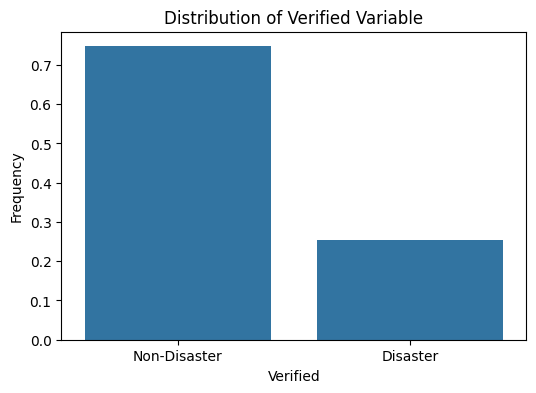

In [ ]:
missing_values = tweets.isnull().sum()
target_distribution = tweets['Verified'].value_counts(normalize=True)

# Plotting the distribtion of the Verified variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Verified Variable')
plt.xlabel('Verified')
plt.ylabel('Frequency')
plt.xticks(['False', 'True'], ['Non-Disaster', 'Disaster'])
plt.show()

In [ ]:
print('shape of train dataset',tweets.shape)

shape of train dataset (2559, 13)


In [ ]:
# Performing sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

tweets['sentiment'] = tweets['Tweets'].apply(analyze_sentiment)
print(tweets.head())


                                         Name          UserName  \
0                              Drought Center    @DroughtCenter   
1                    Prabhakar Goud Kurmimdla  @PrabhakarGoud_K   
2                Humanity First International          @HFI1995   
3  NCWQ Worldwide News And Disasters Explorer    @RTheExplorer1   
4                               BestDealsEver  @MilwaukeeHotBuy   

                  Timestamp  Verified  \
0  2024-02-29T13:30:07.000Z     False   
1  2024-02-27T05:20:43.000Z     False   
2  2024-03-03T07:03:34.000Z     False   
3  2024-02-29T10:20:18.000Z     False   
4  2024-02-28T17:58:01.000Z     False   

                                              Tweets  Comments  Retweets  \
0  US Drought Monitor 2-29-24\n\nHappy Leap Day! ...         0        17   
1                                Synonym is #Drought         0         0   
2  Across South America in the last two months, #...         0         9   
3  Wildfires  Going On In Texas  #wildfires #t

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Simple text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # To remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # To remove special characters
    text = text.lower()  # To convert to lowercase
    return text

# To apply cleaning
tweets['clean_text'] = tweets['Tweets'].apply(clean_text)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(tweets['clean_text'], tweets['Verified'], test_size=0.2, random_state=42)

# To vectorize text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Trying simple models:
Logistic Regession, Random Forest, Support Vector Machine, Gradient Boosting, Naive Bayes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initializing different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Dictionary to store accuracy results
accuracies = {}

# To train, predict and calculate accuracy for each model
for name, model in models.items():
    model.fit(X_train_vec, y_train)  # Training the model
    y_pred = model.predict(X_test_vec)  # Predicting on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy
    accuracies[name] = accuracy  # Storing accuracy in the dictionary
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")

# To find the model with the highest accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy * 100:.2f}%")


Logistic Regression Accuracy: 83.01%
Random Forest Accuracy: 86.72%
Support Vector Machine Accuracy: 85.35%
Gradient Boosting Accuracy: 84.18%
K-Nearest Neighbors Accuracy: 73.83%
Naive Bayes Accuracy: 82.62%

Best Model: Random Forest with Accuracy: 86.72%


Improving Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing Random Forest
rf = RandomForestClassifier()

# To Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_vec, y_train)

# For Best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_accuracy * 100:.2f}%")

# To use the best model to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_vec)
final_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Final Test Accuracy with Best Random Forest: {final_accuracy * 100:.2f}%")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 86.71%
Final Test Accuracy with Best Random Forest: 87.30%


# Trying BERT for Sequence classification

In [ ]:
pip install transformers

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.metrics import accuracy_score
import torch.nn as nn

# Simple text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Removes URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removes special characters
    text = text.lower()  # Converts to lowercase
    return text

# Loading the dataset
tweets = pd.read_csv('/content/DisasterTweets.csv')

# Applying text cleaning
tweets['clean_text'] = tweets['Tweets'].apply(clean_text)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    tweets['clean_text'], tweets['Verified'], test_size=0.2, random_state=42
)

# Reindexing to avoid KeyError issues
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# To initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preparing the data (Tokenization)
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# To Create datasets
train_dataset = TweetDataset(X_train, y_train, tokenizer, max_len=128)
test_dataset = TweetDataset(X_test, y_test, tokenizer, max_len=128)

# Experiment with batch size
batch_size = 32

# To create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Loading a more advanced model
model = BertForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Adjusting learning rate
learning_rate = 2e-5  # You might want to try different values
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)  # Added weight decay

# Scheduler and warmup
epochs = 10
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=total_steps//10, num_training_steps=total_steps)

# Early stopping criteria
early_stopping_patience = 3
best_accuracy = 0
early_stopping_counter = 0

# Training loop with early stopping
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()

    # Evaluation after each epoch
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).flatten()

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # To calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f'Epoch {epoch+1}/{epochs} - Loss: {epoch_loss/len(train_loader):.4f} - Accuracy: {accuracy * 100:.2f}%')

    # Early stopping logic
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        early_stopping_counter = 0  # Reset counter if accuracy improves
    else:
        early_stopping_counter += 1  # Increments counter if accuracy does not improve
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

    model.train()  # To set the model back to training mode

print(f'Best Accuracy Achieved: {best_accuracy * 100:.2f}%')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight'

Epoch 1/10 - Loss: 0.5927 - Accuracy: 75.78%


# RoBERTa Model

In [ ]:
!pip install transformers
!pip install torch
!pip install scikit-learn

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.metrics import accuracy_score
import torch.nn as nn

# Simple text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Removes URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removes special characters
    text = text.lower()  # Converts to lowercase
    return text

# Loads the dataset
tweets = pd.read_csv('/content/DisasterTweets.csv')

# Applying text cleaning
tweets['clean_text'] = tweets['Tweets'].apply(clean_text)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    tweets['clean_text'], tweets['Verified'], test_size=0.2, random_state=42
)

# Reindexing to avoid KeyError issues
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialising RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Preparing the data (Tokenization)
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Creating datasets
train_dataset = TweetDataset(X_train, y_train, tokenizer, max_len=128)
test_dataset = TweetDataset(X_test, y_test, tokenizer, max_len=128)

batch_size = 16

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Loads RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Adjusts learning rate
learning_rate = 2e-5
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

# Scheduler and warmup
epochs = 10
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=total_steps//10, num_training_steps=total_steps)

# Early stopping criteria
early_stopping_patience = 3
best_accuracy = 0
early_stopping_counter = 0

# Training loop with early stopping
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()

    # Evaluation after each epoch
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).flatten()

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # To calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f'Epoch {epoch+1}/{epochs} - Loss: {epoch_loss/len(train_loader):.4f} - Accuracy: {accuracy * 100:.2f}%')

    # Early stopping logic
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        early_stopping_counter = 0  # Reset counter if accuracy improves
    else:
        early_stopping_counter += 1  # Increment counter if accuracy does not improve
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

    model.train()  # Sets the model back to training mode

print(f'Best Accuracy Achieved: {best_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-3-85ede9cacdb0>:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'labels': torch.tensor(label, dtype=torch.long)


Epoch 1/10 - Loss: 0.5875 - Accuracy: 77.34%


<ipython-input-3-85ede9cacdb0>:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'labels': torch.tensor(label, dtype=torch.long)


Epoch 2/10 - Loss: 0.4954 - Accuracy: 81.84%


<ipython-input-3-85ede9cacdb0>:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'labels': torch.tensor(label, dtype=torch.long)


Epoch 3/10 - Loss: 0.3358 - Accuracy: 78.52%


<ipython-input-3-85ede9cacdb0>:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'labels': torch.tensor(label, dtype=torch.long)


Epoch 4/10 - Loss: 0.2038 - Accuracy: 85.94%


<ipython-input-3-85ede9cacdb0>:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'labels': torch.tensor(label, dtype=torch.long)


Epoch 5/10 - Loss: 0.1764 - Accuracy: 78.71%


<ipython-input-3-85ede9cacdb0>:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'labels': torch.tensor(label, dtype=torch.long)


Epoch 6/10 - Loss: 0.1584 - Accuracy: 85.94%


<ipython-input-3-85ede9cacdb0>:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'labels': torch.tensor(label, dtype=torch.long)


Epoch 7/10 - Loss: 0.1076 - Accuracy: 83.20%
Early stopping triggered
Best Accuracy Achieved: 85.94%


# CNN MODEL

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split

# Loading dataset
tweets = pd.read_csv('/content/DisasterTweets.csv')

# Preprocessing function
def clean_text(text):
    import re
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespaces
    return text

# Cleaning tweets
tweets['clean_text'] = tweets['Tweets'].apply(clean_text)


In [ ]:
# Tokenising text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets['clean_text'])
sequences = tokenizer.texts_to_sequences(tweets['clean_text'])
word_index = tokenizer.word_index

# Pad sequences
max_len = 50
data = pad_sequences(sequences, maxlen=max_len)

# To split data
X_train, X_test, y_train, y_test = train_test_split(data, tweets['Verified'], test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(len(word_index) + 1, 50, input_length=max_len),
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7265 - loss: 1.7607 - val_accuracy: 0.7734 - val_loss: 0.8838
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7508 - loss: 0.8163 - val_accuracy: 0.7734 - val_loss: 0.6396
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7341 - loss: 0.6516 - val_accuracy: 0.7734 - val_loss: 0.5609
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7412 - loss: 0.5711 - val_accuracy: 0.8184 - val_loss: 0.5122
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8861 - loss: 0.3894 - val_accuracy: 0.8594 - val_loss: 0.4760
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9562 - loss: 0.2783 - val_accuracy: 0.8613 - val_loss: 0.4556
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9797 - loss: 0.2279 - val_accuracy: 0.8516 - val_loss: 0.4451
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9885 - loss: 0.1928 - val_accuracy: 0.8750 - v

# BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
pip install transformers tensorflow

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

tweets = pd.read_csv('/content/DisasterTweets.csv')

# Simple text cleaning
tweets['clean_text'] = tweets['Tweets'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # Remove non-alphabetic characters
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: x.lower().strip())  # Lowercase

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tweets['clean_text'], tweets['Verified'], test_size=0.2, random_state=42)

# Loads the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_sentences(sentences, max_len=512):
    return tokenizer(sentences, padding=True, truncation=True, max_length=max_len, return_tensors='tf')

# Encodes the data
train_encodings = encode_sentences(X_train.tolist())
test_encodings = encode_sentences(X_test.tolist())

# Loads pre-trained BERT for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Training the model
model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    y_train,
    validation_data=({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, y_test),
    batch_size=16,
    epochs=10
)

# Evaluating the model
model.evaluate({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, y_test)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
128/128 [==============================] - 81s 338ms/step - loss: 0.5392 - accuracy: 0.7645 - val_loss: 0.4785 - val_accuracy: 0.8164
Epoch 2/10
128/128 [==============================] - 38s 295ms/step - loss: 0.4340 - accuracy: 0.8090 - val_loss: 0.4383 - val_accuracy: 0.8223
Epoch 3/10
128/128 [==============================] - 40s 315ms/step - loss: 0.2741 - accuracy: 0.8872 - val_loss: 0.4637 - val_accuracy: 0.8457
Epoch 4/10
128/128 [==============================] - 40s 316ms/step - loss: 0.1591 - accuracy: 0.9399 - val_loss: 0.4545 - val_accuracy: 0.8672
Epoch 5/10
128/128 [==============================] - 38s 297ms/step - loss: 0.0730 - accuracy: 0.9751 - val_loss: 0.5550 - val_accuracy: 0.8770
Epoch 6/10
128/128 [==============================] - 41s 317ms/step - loss: 0.0389 - accuracy: 0.9858 - val_loss: 0.7688 - val_accuracy: 0.8301
Epoch 7/10
128/128 [==============================] - 41s 316ms/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.5739 - val_ac

[0.6148936152458191, 0.84765625]

In second Colab file, 'Test2 for Tweets analytics', Bert model is further improved, SBert and Improved XGBoost model on top of SBert are also trained and tested to get accuracies above 90%. Improved BERT has inceased accuracy (86.13) whereas SBert (91.99) and Improved XGBoost model on top of SBert (93).